In [44]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams.update({
    
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'font.size' : 14
})

%config InlineBackend.figure_formats = ['svg']

In [45]:
# df = pd.read_csv("log/describe_all_cpu_ruche_complete.csv")
# df = pd.read_csv("log/describe_all_cpu_ruche.csv")
# df_gpu = pd.read_csv("log/describe_all_gpu_ruche_large.csv")
# df_gpu = pd.read_csv("log/describe_all_gpu_noBR1D.csv")

df = pd.read_csv("log/describe_all_adastra_cpu.csv")
df_gpu = pd.read_csv("log/describe_all_adastra_gpu.csv")


#we drop the false values
# df = df.drop(df[(df['kernel']=="Scoped") | (df['kernel']=="NDRange")].index)

In [47]:
kernels_name = df["kernel"].unique()

values_cpu = {
    #'kernel_name': ([size1,size2,size3], [value1, value2, value3])
}

values_gpu = {}

for kernel_type in kernels_name:
    #fill gpu
    one_kernel_gpu = df_gpu[df_gpu["kernel"] == kernel_type]
    values_gpu[kernel_type] = (one_kernel_gpu["global_size"], one_kernel_gpu['cellspersec_mean'])

    #fill cpu
    one_kernel_cpu = df[df["kernel"] == kernel_type]
    values_cpu[kernel_type] = (one_kernel_cpu["global_size"], one_kernel_cpu['cellspersec_mean'])

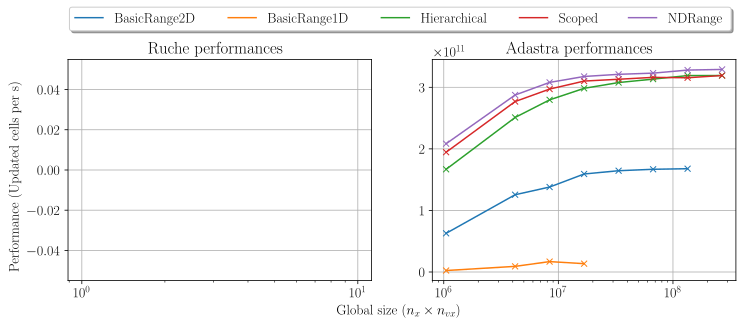

In [48]:
fig = plt.figure(figsize=(12,4))#, constrained_layout=True)
ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Tracer les données
for key, data in values_cpu.items():
    sizes, perf = data

    ax1.plot(sizes, perf*10e9, 'x-', label=key)
    
    #fake plot to set the legend
    ax.plot(0, 0, label=key)
    

for key, data in values_gpu.items():
    sizes, perf = data
    ax2.plot(sizes, perf*10e9, 'x-', label=key)


box = ax.get_position()

ax.legend(loc='lower center', bbox_to_anchor=(box.width/2 + 0.11, box.width/2 + 0.71), fancybox=True, shadow=True, ncol=5)

#set common labels (i.e. the labels of the large subplot)
ax.set_ylabel('Performance (Updated cells per s)')
ax.set_xlabel('Global size ($n_x \\times n_{vx}$)')

#Turn off axis for the large subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax1.set_title('CPU performances')
ax2.set_title('GPU performances')
subfigs = [ax1, ax2]
for subfig in subfigs:
    subfig.grid(True)
    subfig.set_xscale('log', base=10)

plt.show()
# fig.savefig("plot.pdf")

In [49]:
KERNEL_TYPE = "Hierarchical"
same_kernel = df[df['kernel']==KERNEL_TYPE]

sizes = same_kernel['global_size']

gbs = same_kernel['throughput_mean']
gbs_std = same_kernel['throughput_std']

errors = same_kernel['error_mean']
errors_std = same_kernel['error_std']

In [ ]:
def create_subplots(v: list, titles: list):
    fig = plt.figure(figsize=(12,10))#, constrained_layout=True)
    # fig = plt.figure()
    ax = fig.add_subplot(111)    # The big subplot
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    subfigs=[ax1, ax2, ax3, ax4]
    
    # Tracer les données
    for key, data in v[0].items():
        sizes, perf, std = data


        ax1.plot(sizes, perf, 'x-', label=key)
        
        #fake plot to set the legend
        ax.plot(0, 0, label=key)
        
    for i, vv in enumerate(v[1:]):
        for key, data in vv.items():
            sizes, perf, std = data
            
            subfigs[i+1].plot(sizes, perf, 'x-', label=key)


    box = ax.get_position()

    ax.legend(loc='lower center', bbox_to_anchor=(box.width/2 + 0.11, box.width/2 + 0.66), fancybox=True, shadow=True, ncol=5)

    #set common labels (i.e. the labels of the large subplot)
    ax.set_ylabel('Average throughput (GB/s)')
    ax.set_xlabel('Global size ($n_x \\times n_{y}$ with $n_x = 1024 $)')

    #Turn off axis for the large subplot
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    ax1.set_title(titles[0])
    ax2.set_title(titles[1])
    ax3.set_title(titles[2])
    ax4.set_title(titles[3])

    for subfig in subfigs:
        subfig.grid(True)
        subfig.set_xscale('log', base=2)

    plt.show()
    fig.savefig("multiplot.pdf")